In [1]:
import pandas as pd
import plotly.express as px
import sklearn
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

c:\Users\chick\Desktop\Projects\automatestuff\automate\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Resources used:
https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f

## Feature descriptions

Age — numerical variable; age in years
<br>
Income — numerical variable; annual income in dollars
<br>
Home status — categorical variable; “rent”, “mortgage” or “own”
<br>
Employment length — numerical variable; employment length in years
<br>
Loan intent — categorical variable; “education”, “medical”, “venture”, “home improvement”, “personal” or “debt consolidation”
<br>
Loan amount — numerical variable; loan amount in dollars
<br>
Loan grade — categorical variable; “A”, “B”, “C”, “D”, “E”, “F” or “G”
<br>
Interest rate — numerical variable; interest rate in percentage
<br>
Loan to income ratio — numerical variable; between 0 and 1
<br>
Historical default — binary, categorical variable; “Y” or “N”
<br>
Loan status — binary, numerical variable; 0 (no default) or 1 (default) → this is going to be our target variable


In [32]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT             123.00   
1          21           9600                   OWN               5.00   
2          25           9600              MORTGAGE               1.00   
3          23          65500                  RENT               4.00   
4          24          54400                  RENT               8.00   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [4]:
df.describe()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    32581.00       32581.00           31686.00   32581.00       29465.00   
mean        27.73       66074.85               4.79    9589.37          11.01   
std          6.35       61983.12               4.14    6322.09           3.24   
min         20.00        4000.00               0.00     500.00           5.42   
25%         23.00       38500.00               2.00    5000.00           7.90   
50%         26.00       55000.00               4.00    8000.00          10.99   
75%         30.00       79200.00               7.00   12200.00          13.47   
max        144.00     6000000.00             123.00   35000.00          23.22   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count     32581.00             32581.00                    32581.00  
mean          0.22                 0.17                        5.80  
std           0.41                 0.11                        4.06  
min           0.00                 0.00                        2.00  
25%           0.00                 0.09                        3.00  
50%           0.00                 0.15                        4.00  
75%           0.00                 0.23                        8.00  
max           1.00                 0.83                       30.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

person_age                   0.00
person_income                0.00
person_home_ownership        0.00
person_emp_length            2.75
loan_intent                  0.00
loan_grade                   0.00
loan_amnt                    0.00
loan_int_rate                9.56
loan_status                  0.00
loan_percent_income          0.00
cb_person_default_on_file    0.00
cb_person_cred_hist_length   0.00
dtype: float64

In [33]:
#impute na values
#df = df.dropna(axis=0)

df.fillna(df.median(), inplace = True)

In [9]:
df.describe()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    28638.00       28638.00           28638.00   28638.00       28638.00   
mean        27.73       66649.37               4.79    9656.49          11.04   
std          6.31       62356.45               4.15    6329.68           3.23   
min         20.00        4000.00               0.00     500.00           5.42   
25%         23.00       39480.00               2.00    5000.00           7.90   
50%         26.00       55956.00               4.00    8000.00          10.99   
75%         30.00       80000.00               7.00   12500.00          13.48   
max        144.00     6000000.00             123.00   35000.00          23.22   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count     28638.00             28638.00                    28638.00  
mean          0.22                 0.17                        5.79  
std           0.41                 0.11                        4.04  
min           0.00                 0.00                        2.00  
25%           0.00                 0.09                        3.00  
50%           0.00                 0.15                        4.00  
75%           0.00                 0.23                        8.00  
max           1.00                 0.83                       30.00

In [10]:
#Scatterplot matrix
fig = px.scatter_matrix(df, dimensions=
["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate"],
labels={col:col.replace('_', ' ') for col in df.columns},height=900, color="loan_status",color_continuous_scale=px.colors.diverging.Tealrose)

In [11]:
fig.show()

In [34]:
# Remove Outliers
df = df[df["person_age"]<=100]
df = df[df["person_emp_length"]<=100]
df = df[df["person_income"]<=4000000]

In [13]:
#Percentage of non-default cases
data_0 = df[df.loan_status == 0].loan_status.count() / df.loan_status.count()
data_0

0.7833892148644873

In [14]:
data_1 = df[df.loan_status == 1].loan_status.count() / df.loan_status.count()
data_1

0.2166107851355127

In [15]:
#Box plot
fig = px.box(df, x="loan_grade", y="loan_percent_income", color="loan_status",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_', ' ') for col in df.columns},
category_orders={"loan_Grade":["A","B","C","D","E","F","G"]})

In [16]:
fig.update_layout(legend = dict(orientation="h", yanchor="bottom",
y=1.02, xanchor = "right", x=1))

In [35]:
#One hot encoding of categorical variables
df = pd.get_dummies(data=df,columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],drop_first=True)

In [36]:
#Train and test split
Y = df['loan_status']
X = df.drop('loan_status',axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)

In [37]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [08:19<00:00, 17.23s/it]


In [38]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.94               0.86     0.86      0.93   
LGBMClassifier                     0.93               0.85     0.85      0.93   
RandomForestClassifier             0.93               0.85     0.85      0.93   
BaggingClassifier                  0.93               0.85     0.85      0.93   
DecisionTreeClassifier             0.89               0.84     0.84      0.89   
ExtraTreesClassifier               0.92               0.83     0.83      0.92   
SVC                                0.91               0.81     0.81      0.91   
AdaBoostClassifier                 0.89               0.80     0.80      0.88   
KNeighborsClassifier               0.90               0.79     0.79      0.89   
LabelSpreading                     0.87               0.78     0.78      0.86   
LabelPropagation                   0.86               0.78     0.78      0.86   
NearestCentroid                    0.81               0.78     0.78      0.82   
ExtraTreeClassifier                0.84               0.77     0.77      0.84   
LinearDiscriminantAnalysis         0.87               0.76     0.76      0.86   
SGDClassifier                      0.86               0.76     0.76      0.86   
LogisticRegression                 0.87               0.75     0.75      0.86   
CalibratedClassifierCV             0.87               0.75     0.75      0.86   
LinearSVC                          0.87               0.75     0.75      0.86   
RidgeClassifier                    0.86               0.74     0.74      0.85   
RidgeClassifierCV                  0.86               0.74     0.74      0.85   
PassiveAggressiveClassifier        0.85               0.73     0.73      0.84   
BernoulliNB                        0.82               0.71     0.71      0.82   
Perceptron                         0.72               0.70     0.70      0.74   
GaussianNB                         0.80               0.55     0.55      0.75   
QuadraticDiscriminantAnalysis      0.80               0.53     0.53      0.73   
DummyClassifier                    0.66               0.50     0.50      0.66   

                               Time Taken  
Model                                      
XGBClassifier                        1.76  
LGBMClassifier                       0.41  
RandomForestClassifier               8.93  
BaggingClassifier                    3.39  
DecisionTreeClassifier               0.64  
ExtraTreesClassifier                 6.62  
SVC                                 37.45  
AdaBoostClassifier                   3.49  
KNeighborsClassifier                20.21  
LabelSpreading                     228.34  
LabelPropagation                   122.19  
NearestCentroid                      0.20  
ExtraTreeClassifier                  0.31  
LinearDiscriminantAnalysis           0.53  
SGDClassifier                        0.56  
LogisticRegression                   0.45  
CalibratedClassifierCV              48.32  
LinearSVC                           13.78  
RidgeClassifier                      0.21  
RidgeClassifierCV                    0.30  
PassiveAggressiveClassifier          0.24  
BernoulliNB                          0.24  
Perceptron                           0.27  
GaussianNB                           0.16  
QuadraticDiscriminantAnalysis        0.22  
DummyClassifier                      0.17

In [39]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = xgb_model.predict(x_test)

In [41]:
predictions = [round(value) for value in y_pred]

In [42]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.66%


In [43]:
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print("Balanced_Accuracy: %.2f%%" % (balanced_accuracy * 100.0))

Balanced_Accuracy: 86.26%


In [60]:
import shap
import numpy as np

In [45]:
# load JS visualization code to notebook
shap.initjs()

model = xgb_model

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_test)






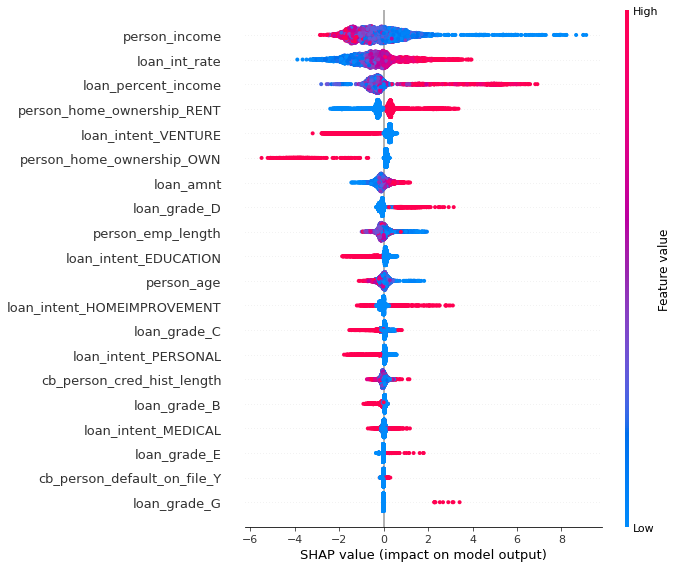

In [30]:
shap.summary_plot(shap_values, x_test)

In [46]:
x_test['loan_int_rate'].argmax()

5461

In [47]:
shap.force_plot(explainer.expected_value, shap_values[2413,:], x_test.iloc[2413,:])

In [69]:
x_test['person_income'].argmax()

4697

In [70]:
shap.force_plot(explainer.expected_value, shap_values[4697,:], x_test.iloc[4697,:])

In [76]:
x_test['person_income'].argmin()

4650

In [77]:
shap.force_plot(explainer.expected_value, shap_values[4650,:], x_test.iloc[4650,:])

In [48]:
x_test['loan_int_rate'].argmin()

200

In [49]:
shap.force_plot(explainer.expected_value, shap_values[96,:], x_test.iloc[96,:])


In [71]:
x_test['person_income'].argmin()

4650

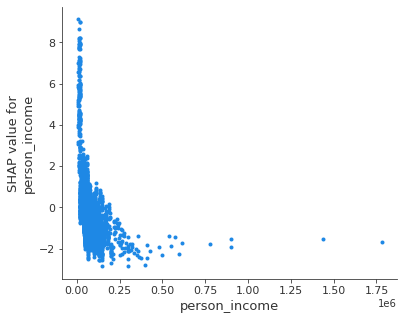

In [50]:
shap.dependence_plot('person_income', shap_values, x_test,interaction_index=None)

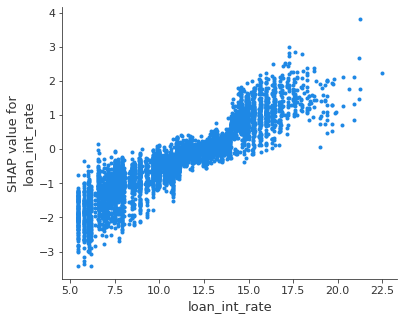

In [50]:
shap.dependence_plot('loan_int_rate', shap_values, x_test,interaction_index=None)

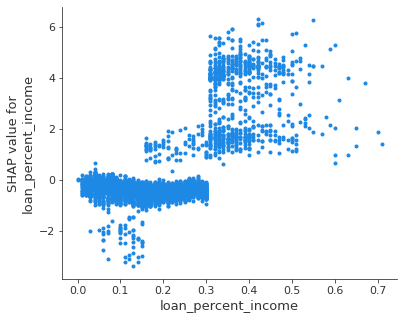

In [51]:
shap.dependence_plot('loan_percent_income', shap_values, x_test,interaction_index=None)

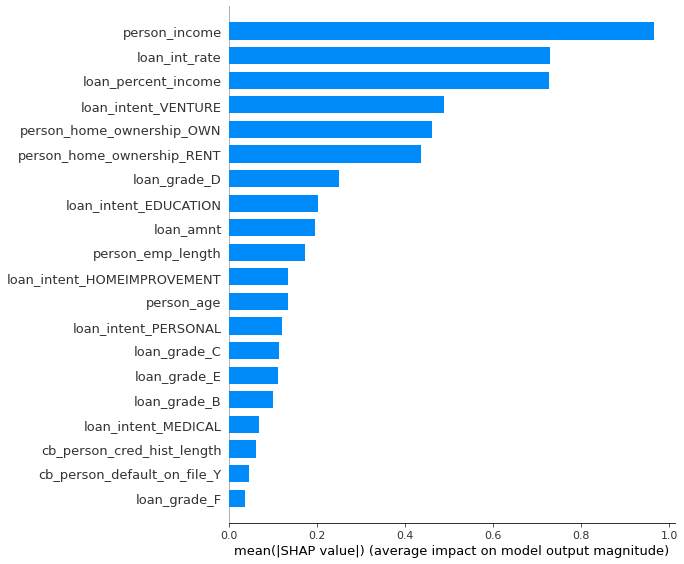

In [52]:
shap.summary_plot(shap_values, x_test,plot_type='bar')

In [ ]:
'''

person_income, loan_int_rate and loan_percent_income are the top 3 features that contribute to predicting the likely hood of someone defualting on their loan.

person_income - A lower income leads to a increased likelihood of someone defaulting

loan_int_rate - A higher interest rate leads to a increased likelihood of someone defaulting

loan_percent_income -  A higher loan as a percentage of income leads to a increased likelihood of someone defaulting. The dependency plot also shows a threshold of 0.3 percent being a key tipping point at which the likelihood increases significantly.

'''